In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review: Comparing Two Samples

In [2]:
def difference_of_means(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [3]:
def one_simulated_difference(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups after shuffling labels
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, numeric_label, 'Shuffled Label')   

In [4]:
births = Table.read_table('data/baby.csv')

In [5]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [8]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')
# what does the value below mean in words?
# difference in babies' weights between two groups
# On average, babies were 9.27 ounces lighter in the nonsmoking group than the smoking group.
# On average, babies from nonsmoking households were 9.27 ounces smaller at birth than babies from smoking households.

-9.266142572024918

In [10]:
reduced = births.select('Birth Weight', 'Maternal Smoker')  
reduced

Birth Weight,Maternal Smoker
120,False
113,False
128,True
108,True
136,False
138,False
132,False
120,False
143,True
140,False


In [12]:
  
# table containing group means
means_table = reduced.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [13]:
  # array of group means
means = means_table.column(1)
means  
 #means.item(1) - means.item(0)
# average babies weight from smoking - average babies weight from nonsmoking


array([ 123.08531469,  113.81917211])

In [15]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
# what does this number below mean?
# in our simulation, we found that babies from smoking mothers were on average 1.41 oz heavier than babies from nonsmoking mothers.
# heavier: babies from smoking mothers



1.4119505766564515

In [16]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
# why is the number below different than the one above?
# in our simulation, we found that babies from smoking mothers were on average 0.19 ounces lighter than babies from nonsmoking mothers.
# heavier: babies from nonsmoking mothers


-0.19065770830476936

In [17]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
# babies birth weights from both groups are on average equal
# difference is close to zero ounces

0.0060910766793114135

In [18]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')


0.2708076237487944

In [19]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')


-0.5662690250925522

In [20]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')


-0.7093590505355252

In [21]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')


-0.7630178100766329

In [22]:
##??? in our simulations we found no difference in  birth weights between smoking/nonsmoking groups
# is there no correlation then between smoking and baby's birth weight?




In [39]:
simulated_diffs = make_array()

for i in np.arange(10000):
    sim_diff = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    simulated_diffs = np.append(simulated_diffs, sim_diff)

In [40]:
observed_diff = difference_of_means(births, 'Birth Weight', 'Maternal Smoker')


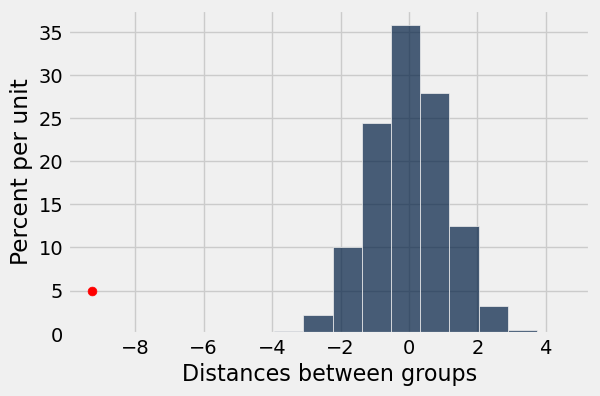

In [41]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)
plots.scatter(observed_diff, 0.05, color='red', s=40, zorder=3)

In [ ]:
# were we ever able to simulate the observed difference between the two groups, with babies birth weights?


In [ ]:
# how much of the time were we able to simulate it? 
# 5%? more than 5%? less than 5%?


In [ ]:
# does our p-value support the null? or the alternative?

In [23]:
botox = Table.read_table('data/bta.csv')
botox.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


# Task:
- Summarize the dataset: show the unique combinations
    - How many people got treatment and experienced improvements?
    - How many people got placebo and experienced improvements?
    - How many people got treatment and didnt experienced improvements?
    - How many people got placebo and didnt experienced improvements?
- Calculate the share of improvements per group

In [24]:
botox.pivot('Result', 'Group')

Group,0.0,1.0
Control,14,2
Treatment,6,9


In [25]:
botox.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


## Tickets
is the distribution of the 

- 31 “treatment” values in Column 1 (including the unknown ones) 
different from the distribution of the 
- 31 “control” values in Column 2 (again including the unknown ones)?

In [26]:
botox = botox.with_column('Outcome if assigned treatment', botox.column('Result'))
botox.column('Outcome if assigned treatment')[botox.column('Group') != 'Treatment'] = np.nan

botox = botox.with_column('Outcome if assigned control', botox.column('Result'))
botox.column('Outcome if assigned control')[botox.column('Group') != 'Control'] = np.nan

botox.show()

Group,Result,Outcome if assigned treatment,Outcome if assigned control
Control,1,nan,1
Control,1,nan,1
Control,0,nan,0
Control,0,nan,0
Control,0,nan,0
Control,0,nan,0
Control,0,nan,0
Control,0,nan,0
Control,0,nan,0
Control,0,nan,0


# Testing the Hypothesis

In [27]:
observed_diff = difference_of_means(botox, 'Result', 'Group')
observed_diff
# patients receiving botox treatment for their pain on average reported 0.475 on a points scale improvement, compared to patients who were 
# in the control group, receiving a placebo.

0.475

In [28]:
one_simulated_difference(botox, 'Result', 'Group')
# in our simulation, patients receiving botox treatment on average reported -.17 on a points scale improvement, compared to patients
# who were in the control group.
# this means, on average, those in the control group saw slightly more improvement in pain than those in the treatment group. 

-0.17083333333333334

In [29]:
one_simulated_difference(botox, 'Result', 'Group')

0.3458333333333333

In [30]:
one_simulated_difference(botox, 'Result', 'Group')

-0.3

In [31]:
one_simulated_difference(botox, 'Result', 'Group')

-0.041666666666666685

In [32]:
one_simulated_difference(botox, 'Result', 'Group')

0.21666666666666667

In [33]:
one_simulated_difference(botox, 'Result', 'Group')

-0.041666666666666685

In [ ]:
# were we able to simulate the observed difference in pain improvement?



# Task: 
1. Simulate the difference 10k times
1. Create a table containing the simulations
1. Plot the histogram
    - Question: in which direction is the alternative?
    - Where on the histogram is the *observed* difference?
    - Bonus: Add the observed difference as a dot into the histogram (use `plots.scatter()`).
1. Calculate the p-value ([hint](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#conclusion-of-the-test))
1. Choose a p-value cutoff

In [34]:
simulated_diffs = make_array()

for i in np.arange(10000):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)

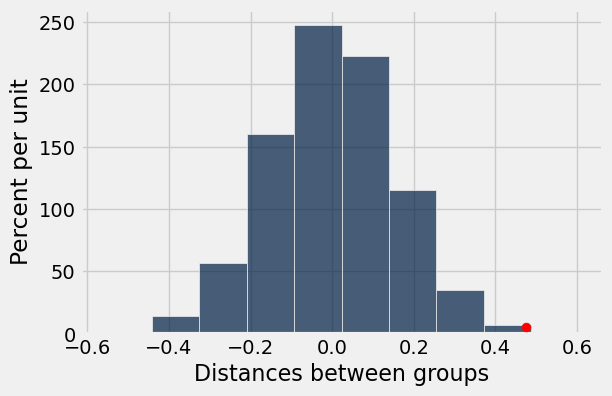

In [35]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)
plots.scatter(observed_diff, 0.05, color='red', s=40, zorder=3)

In [38]:
# p-value
(sum(simulated_diffs >= observed_diff) / len(simulated_diffs))


0.0083000000000000001

In [ ]:
# p-value cut-off?
# do we fail to reject the null-doesn't matter if you get botox treatment, pain is about the same
# or do we lean toward the alternative? botox does help with pain!

